In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
%matplotlib inline   

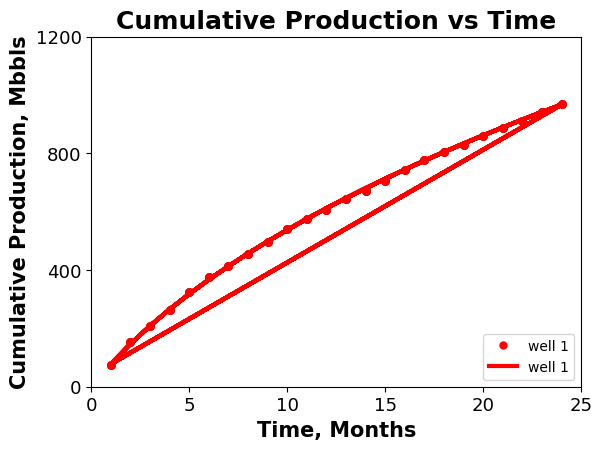

In [38]:
filename= 'DCAwells_Solved/DCA_Well 1.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 1

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 1
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13
del currFig
currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

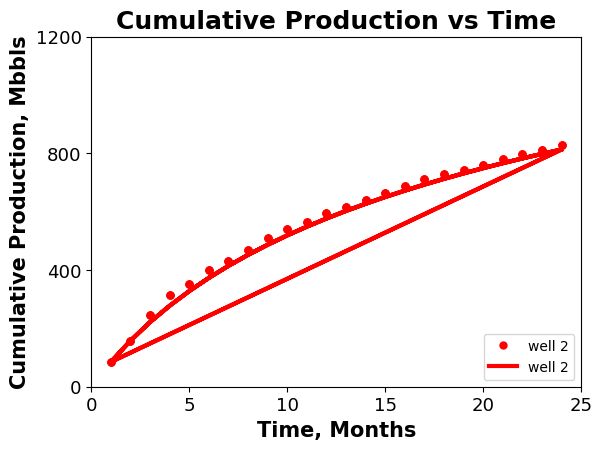

In [39]:
filename= 'DCAwells_Solved/DCA_Well 2.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 2

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 2
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

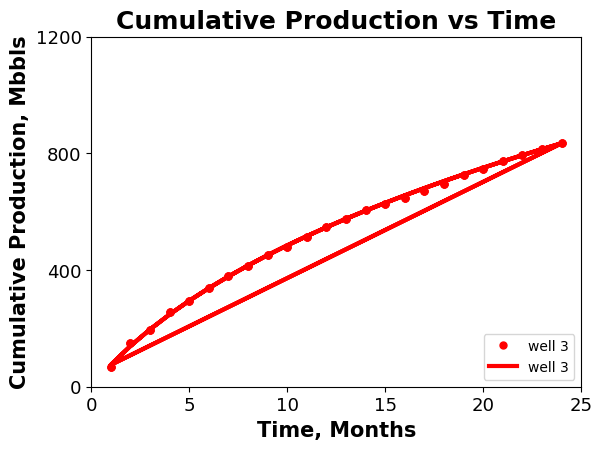

In [40]:
filename= 'DCAwells_Solved/DCA_Well 3.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 3

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 3
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

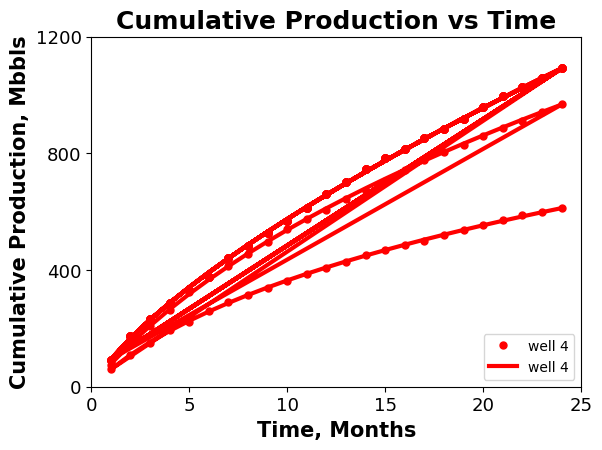

In [41]:
filename= 'DCAwells_Solved/DCA_Well 4.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 4

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 4
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

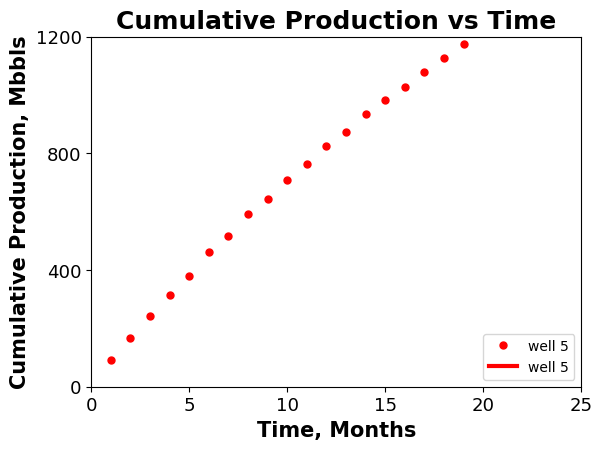

In [42]:
filename= 'DCAwells_Solved/DCA_Well 5.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 5

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 5
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

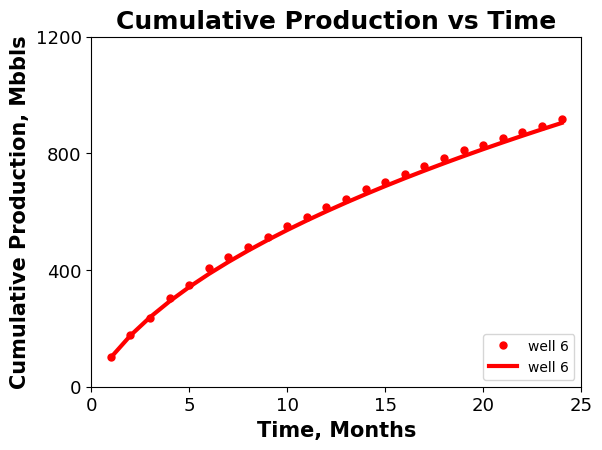

In [43]:
filename= 'DCAwells_Solved/DCA_Well 6.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 6

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 6
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

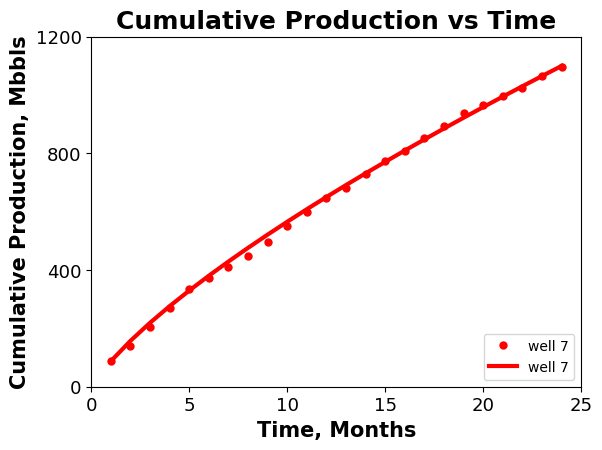

In [44]:
filename= 'DCAwells_Solved/DCA_Well 7.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 7

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 7
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

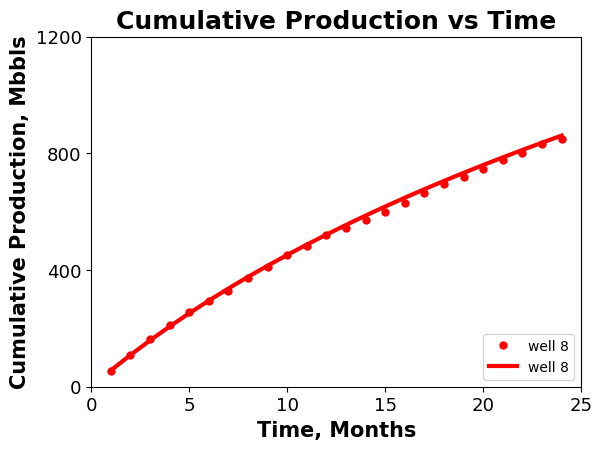

In [45]:
filename= 'DCAwells_Solved/DCA_Well 8.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 8

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 8
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

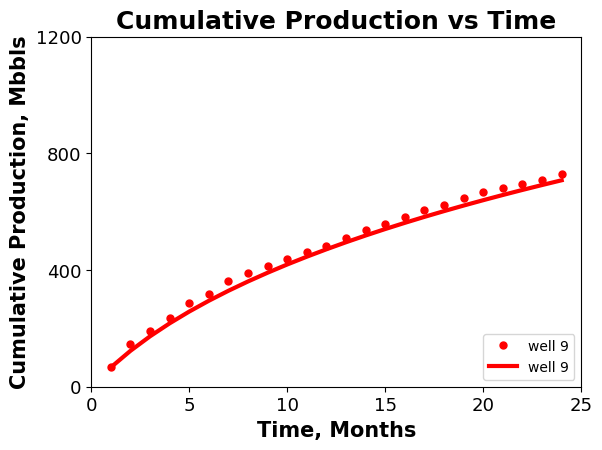

In [46]:
filename= 'DCAwells_Solved/DCA_Well 9.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 9

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 9
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

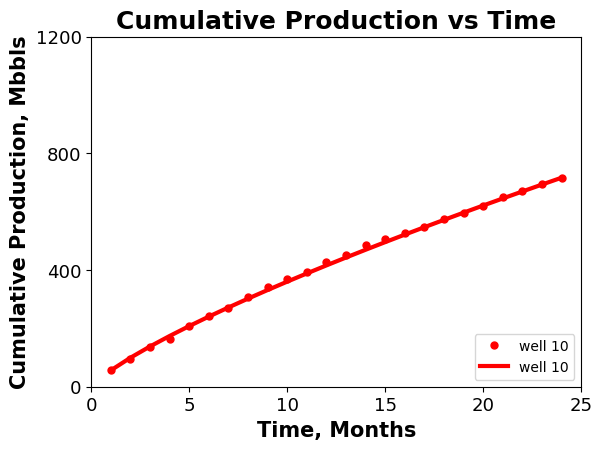

In [47]:
filename= 'DCAwells_Solved/DCA_Well 10.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 10

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 10
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

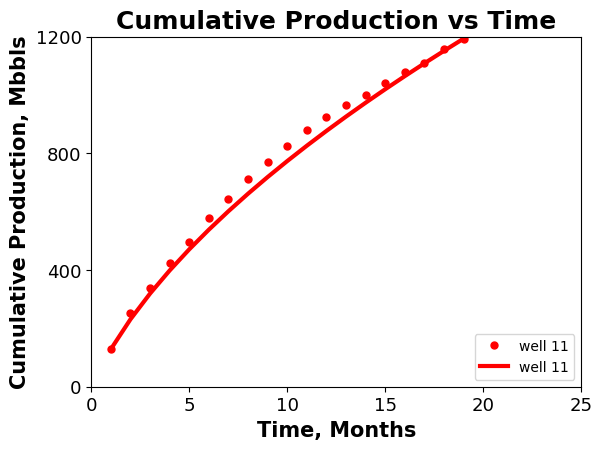

In [48]:
filename= 'DCAwells_Solved/DCA_Well 11.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 11

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 11
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

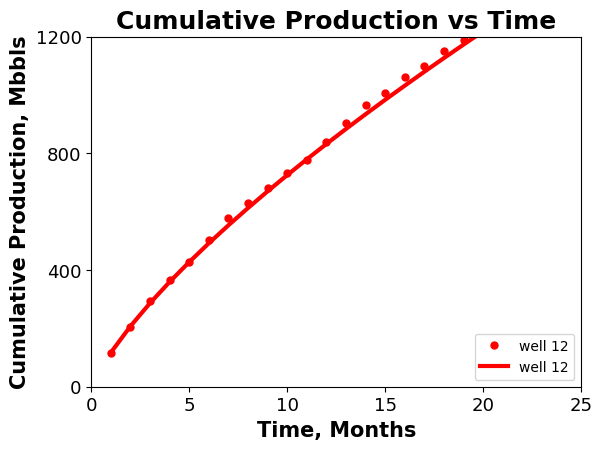

In [49]:
filename= 'DCAwells_Solved/DCA_Well 12.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 12

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 12
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

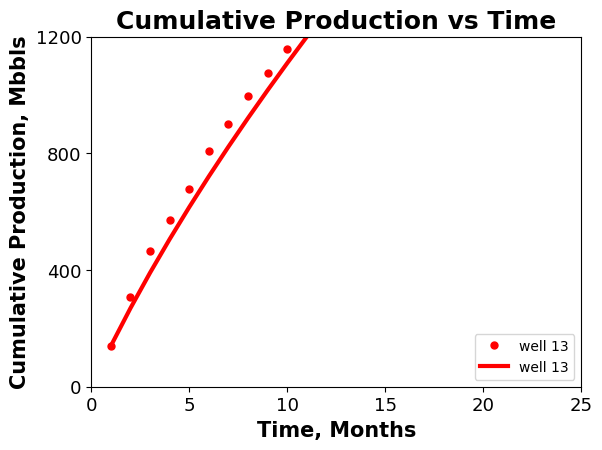

In [50]:
filename= 'DCAwells_Solved/DCA_Well 13.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 13

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 13
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

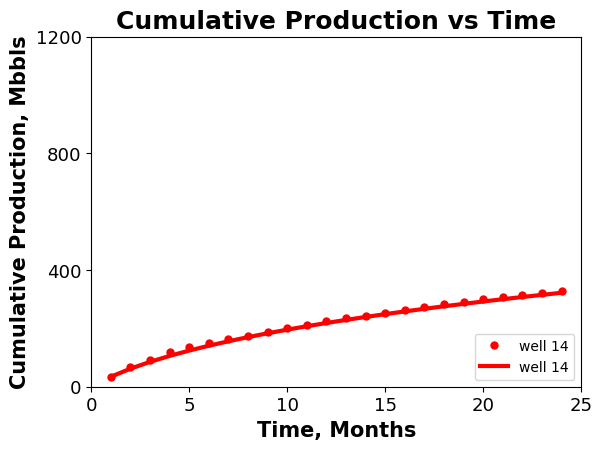

In [51]:
filename= 'DCAwells_Solved/DCA_Well 14.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 14

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 14
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

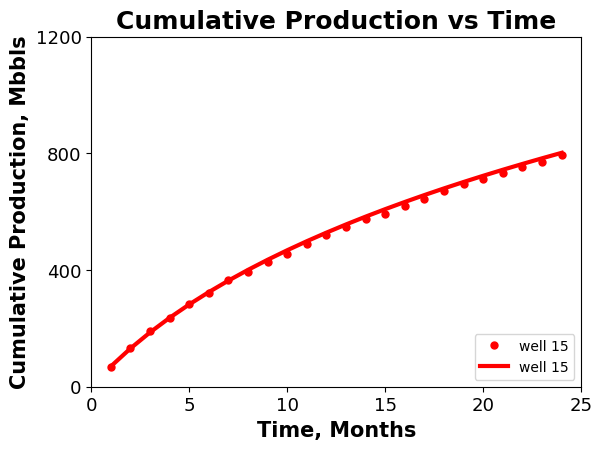

In [52]:
filename= 'DCAwells_Solved/DCA_Well 15.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 15

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 15
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

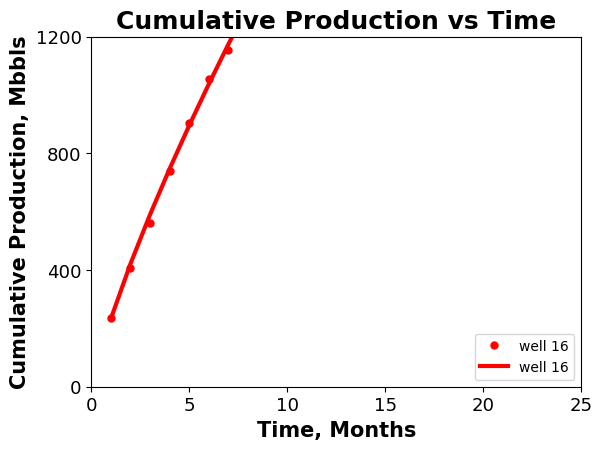

In [53]:
filename= 'DCAwells_Solved/DCA_Well 16.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 16

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 16
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

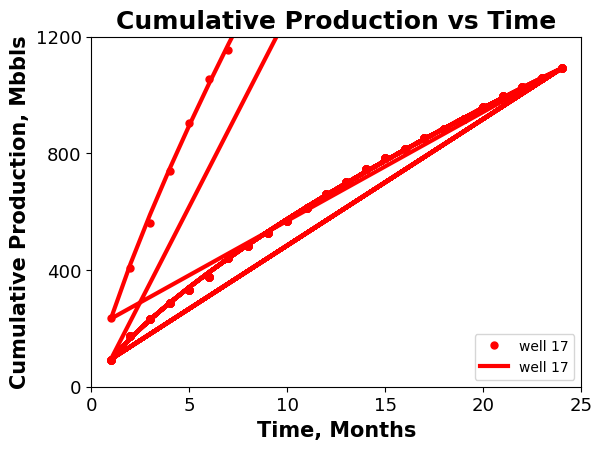

In [54]:
filename= 'DCAwells_Solved/DCA_Well 17.xlsx'

xl = pd.ExcelFile(filename)
df1 = xl.parse('DCARegression')
conn = sqlite3.connect("DCA.db")
cur = conn.cursor()

cur.execute("DROP TABLE DCAparams")
conn.commit()    
cur.execute("CREATE TABLE DCAparams (wellID INTEGER,  qi REAL, Di REAL, b REAL)")
conn.commit()

dfLength = 24
wellID = 17

rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
rateDF['Cum'] = rateDF['rate'].cumsum()

qi = df1.iloc[2,3]
Di = df1.iloc[3,3]
b  = df1.iloc[4,3]

cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
conn.commit()

t = np.arange(1,dfLength+1)
Di = Di/12

if b > 0 :
    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b)))
else :
    q= 30.4375*qi*np.exp(-Di*t)
    Np=30.4375*((qi/Di)*(np.exp(-Di*t)/Di))
    
error_q = rateDF['rate'].values - q
SSE_q = np.dot(error_q, error_q)

errorNp = rateDF['Cum'].values - Np
SSE_Np = np.dot(errorNp,errorNp)

rateDF['q_model'] = q
rateDF['Cum_model'] = Np
rateDF.to_sql("Rates", conn, if_exists="append", index = False)

df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
conn.close()

conn = sqlite3.connect("DCA.db")
wellID = 17
df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])
axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize); 

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize); 

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)